In [51]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
from leakageFuncs import normalizeImage,displayImage

In [14]:
with open('data/CentralResults.pkl','rb') as fi:
    centralData = pickle.load(fi)
#centralData[0].keys()

dict_keys(['training', 'testError', 'numWorkers'])

In [59]:
with open('data/FederatedResults.pkl','rb') as fi:
    fedData = pickle.load(fi)

In [128]:
with open('data/ByzantineResults_withDifferentCrit.pkl','rb') as fi:
    byz = pickle.load(fi)

In [137]:
with open('data/ByzantineResults_ALL_BETA=0.pkl','rb') as fi:
    byzEr = pickle.load(fi)

In [52]:
import matplotlib.pyplot as plt
# line 1 points
def plotFigs(centralData,j,k,idx):
    y1 = centralData[idx]['training']['perBatch']
    x1 = [i for i in range(len(centralData[idx]['training']['perBatch']))]
    axs[j,k].plot(x1, y1, label = "Training Error")
    x2 = [i[0] for i in centralData[idx]['training']['test']]
    y2 = [i[1] for i in centralData[idx]['training']['test']]
    axs[j,k].plot(x2, y2, label = "Test Error")

    #axs[j,k].title('Final Test Error: {}'.format(centralData[idx]['testError']))
    axs[j,k].set_title('Final Test Error: {}'.format(centralData[idx]['testError']))
    #axs[j,k].suptitle('Centralized SGD')
    axs[j,k].legend()


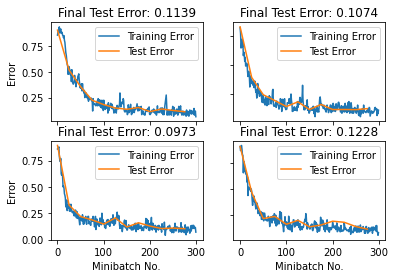

In [122]:
fig, axs = plt.subplots(2, 2)
gs = gridspec.GridSpec(2, 2, width_ratios=[24, 24]) 
idx=0
for i in range(2):
    for j in range(2):
        plotFigs(centralData,i,j,idx)
        idx+=1

idx=0
for ax in axs.flat:
    #axs[j,k].xlabel('Minibatch No.')
    #axs[j,k].ylabel('Error')
    ax.set(xlabel='Minibatch No.', ylabel='Error')

    idx+=1
            

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.savefig("../overleafFigs/centralized.png",dpi=300)

In [123]:
def plotFigsFed(centralData,j,k,idx):
    y1 = centralData[idx]['training'][0]
    x1 = [i for i in range(len(centralData[idx]['training'][0]))]

    axs[j,k].plot(x1, y1, label = "Training Error")
    x2 = [i[0] for i in centralData[idx]['training'][1]['test']]
    y2 = [i[1] for i in centralData[idx]['training'][1]['test']]
    axs[j,k].plot(x2, y2, label = "Test Error")
    #axs[j,k].title('Final Test Error: {}'.format(centralData[idx]['testError']))
    axs[j,k].set_title('Final Test Error: {},k={}'.format(centralData[idx]['FinaltestError'],centralData[idx]['numWorkers']))
    #axs[j,k].suptitle('Centralized SGD')
    axs[j,k].legend()


0.1528
0.1141
0.0934
0.0979


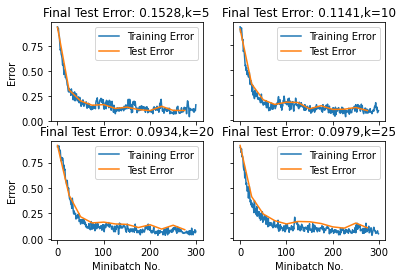

In [124]:
fig, axs = plt.subplots(2, 2)
gs = gridspec.GridSpec(2, 2, width_ratios=[24, 24]) 
idx=0
for i in range(2):
    for j in range(2):
        plotFigsFed(fedData,i,j,idx,)
        idx+=1

idx=0
for ax in axs.flat:
    #axs[j,k].xlabel('Minibatch No.')
    #axs[j,k].ylabel('Error')
    ax.set(xlabel='Minibatch No.', ylabel='Error')

    idx+=1
            

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.savefig("../overleafFigs/federated.png",dpi=300)

In [161]:
byz
workers = [10,20,25]
rates ={10: [.1,.2], 20: [.05,.1,.2], 25:[.05,.1,.2]}
ways =['trimmedMean','median']

In [162]:
byz[10]

{('trimmedMean',
  0): {'training': ([0.9,
    0.875,
    0.885,
    0.89,
    0.895,
    0.85,
    0.8049999999999999,
    0.775,
    0.745,
    0.745,
    0.65,
    0.675,
    0.62,
    0.65,
    0.605,
    0.5700000000000001,
    0.54,
    0.47,
    0.48,
    0.42500000000000004,
    0.54,
    0.41500000000000004,
    0.43500000000000005,
    0.4,
    0.35,
    0.37,
    0.42500000000000004,
    0.4,
    0.32999999999999996,
    0.355,
    0.39,
    0.32499999999999996,
    0.28,
    0.33499999999999996,
    0.32499999999999996,
    0.28,
    0.28500000000000003,
    0.265,
    0.29500000000000004,
    0.22999999999999998,
    0.25,
    0.26,
    0.24,
    0.24,
    0.24,
    0.21999999999999997,
    0.22499999999999998,
    0.18000000000000005,
    0.19999999999999996,
    0.21999999999999997,
    0.21999999999999997,
    0.19999999999999996,
    0.235,
    0.17000000000000004,
    0.16500000000000004,
    0.22499999999999998,
    0.19999999999999996,
    0.17000000000000004,
    0

In [163]:
byzEr[10][('trimmedMean',1)]['FinaltestError']

0.1327

In [173]:
noFix =[]

for way in ways:
    for w in workers:
        for r in rates[w]:
            noFix.append((way,w,r,byzEr[w][(way,int(r*w))]['FinaltestError']))

In [174]:
noFix

[('trimmedMean', 10, 0.1, 0.1327),
 ('trimmedMean', 10, 0.2, 0.1845),
 ('trimmedMean', 20, 0.05, 0.1272),
 ('trimmedMean', 20, 0.1, 0.1467),
 ('trimmedMean', 20, 0.2, 0.1584),
 ('trimmedMean', 25, 0.05, 0.1081),
 ('trimmedMean', 25, 0.1, 0.1212),
 ('trimmedMean', 25, 0.2, 0.1906),
 ('median', 10, 0.1, 0.1233),
 ('median', 10, 0.2, 0.1087),
 ('median', 20, 0.05, 0.1033),
 ('median', 20, 0.1, 0.1079),
 ('median', 20, 0.2, 0.1732),
 ('median', 25, 0.05, 0.0978),
 ('median', 25, 0.1, 0.0955),
 ('median', 25, 0.2, 0.1743)]

In [175]:
        
with open('data/leakageTrials_Cleanset.pkl','rb') as fi:
    res = pickle.load(fi)

In [176]:
res

KeyboardInterrupt: 